#Лабораторная работа 4.

Задача восстановления зависимостей. Манипулирование признаками. Сокращение размерности.


In [1]:
%pip install ucimlrepo
%pip install category_encoders

In [2]:
from ucimlrepo import fetch_ucirepo
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

#Пункт 1


Выбрать подходящую таблицу данных (должна содержать числовые и категориальные переменные).

In [3]:
# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

# metadata
print(air_quality.metadata)

# variable information
print(air_quality.variables)

{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': None, 'additional_info': {'summary': 'The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded i

Временно убрать категориальные признаки.

In [4]:
df = pd.DataFrame(X)
categorical_colums = ['Date', 'Time', 'PT08.S1(CO)','PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
numeric_data = df.drop(categorical_colums, axis=1)
target_name = 'T'
X_numeric_data = numeric_data.drop(target_name,axis=1)
y_numeric_data = numeric_data[target_name]
numeric_data

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,2.6,150,11.9,166,113,13.6,48.9,0.7578
1,2.0,112,9.4,103,92,13.3,47.7,0.7255
2,2.2,88,9.0,131,114,11.9,54.0,0.7502
3,2.2,80,9.2,172,122,11.0,60.0,0.7867
4,1.6,51,6.5,131,116,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...
9352,3.1,-200,13.5,472,190,21.9,29.3,0.7568
9353,2.4,-200,11.4,353,179,24.3,23.7,0.7119
9354,2.4,-200,12.4,293,175,26.9,18.3,0.6406
9355,2.1,-200,9.5,235,156,28.3,13.5,0.5139


Построить линейную регрессию.

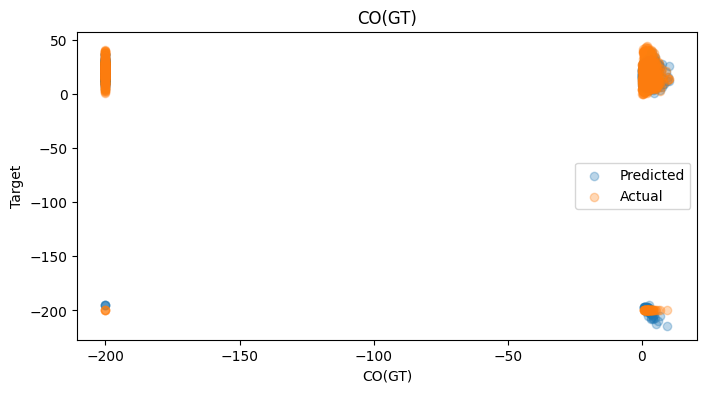

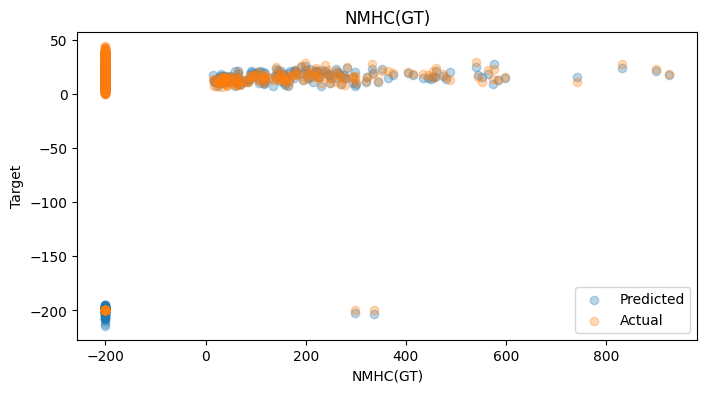

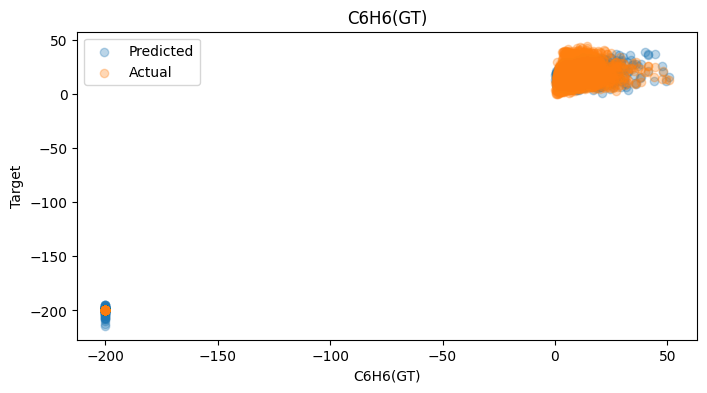

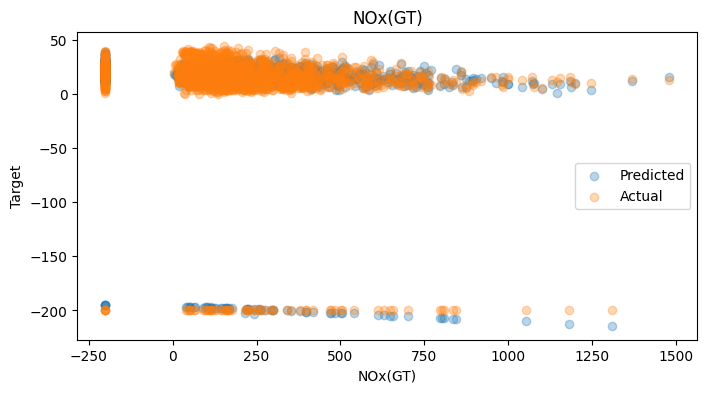

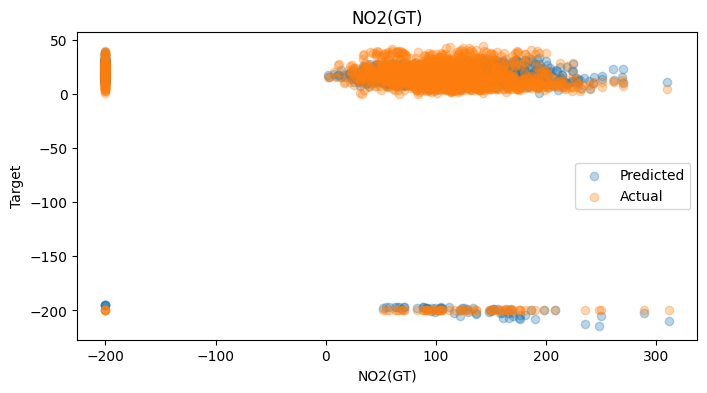

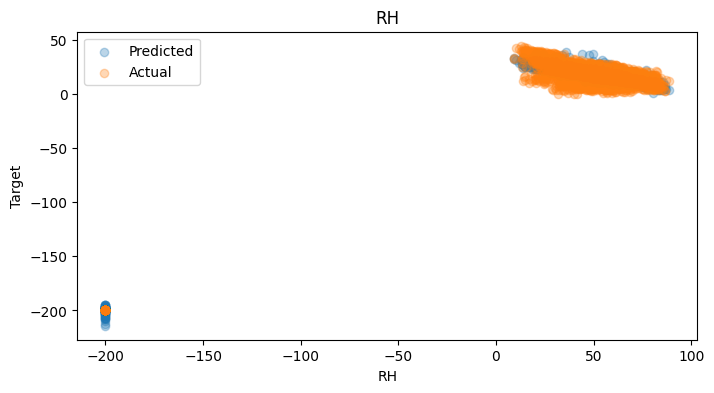

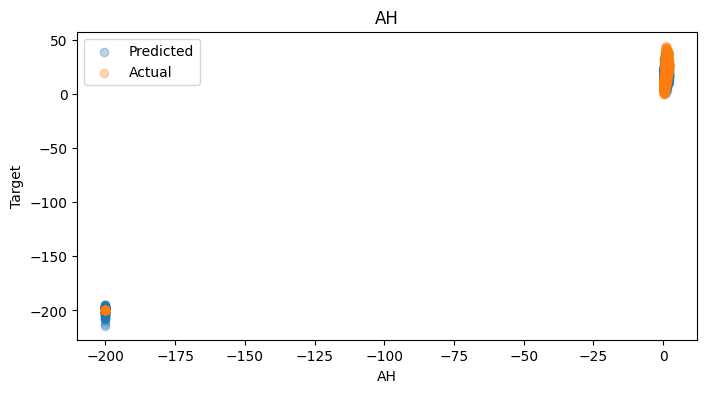

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric_data, y_numeric_data, test_size=0.2)
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

for i, col in enumerate(X_numeric_data):
    plt.figure(figsize=(8, 4))
    plt.scatter(X_test[col], y_pred_lr, label='Predicted', alpha = 0.3)
    plt.scatter(X_test[col], y_test, label='Actual', alpha = 0.3)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.legend()
    plt.show()


#Пункт 2

Построить решение методом бустинга.

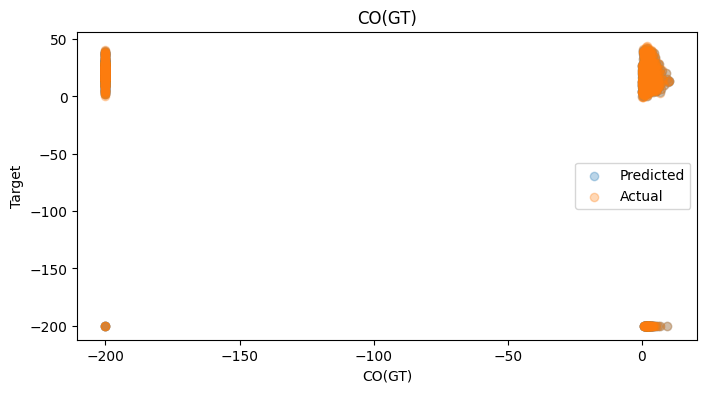

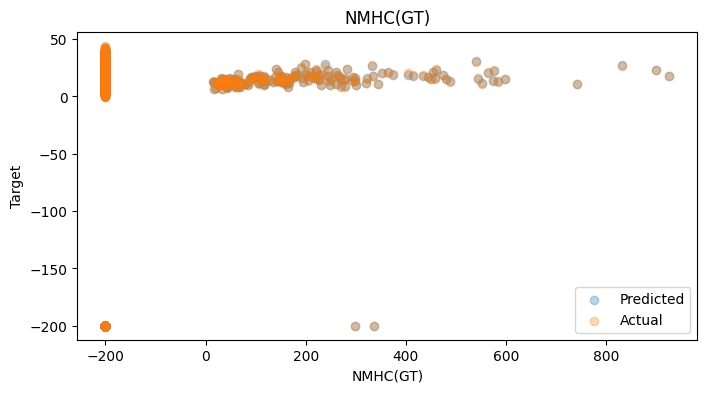

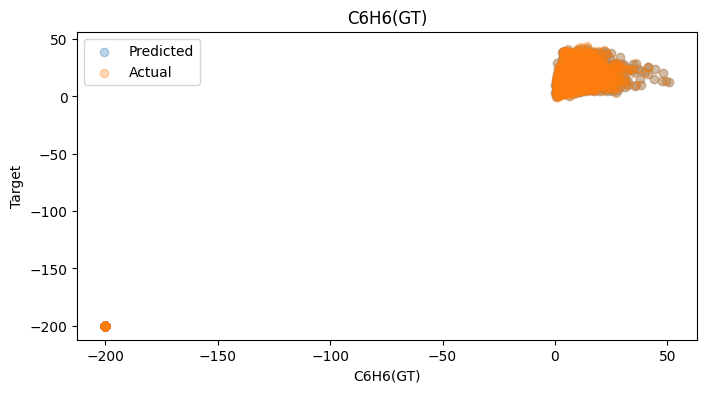

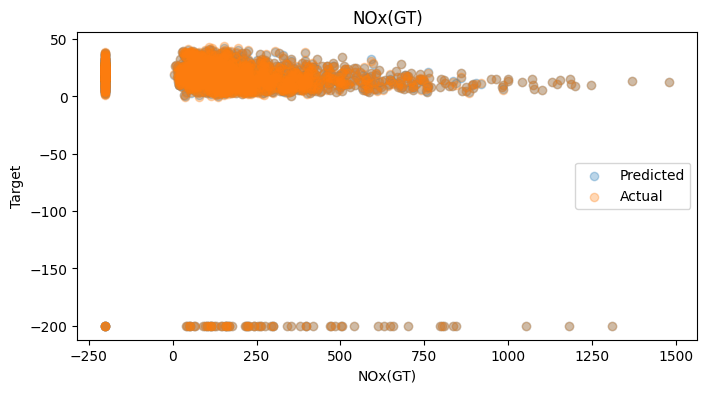

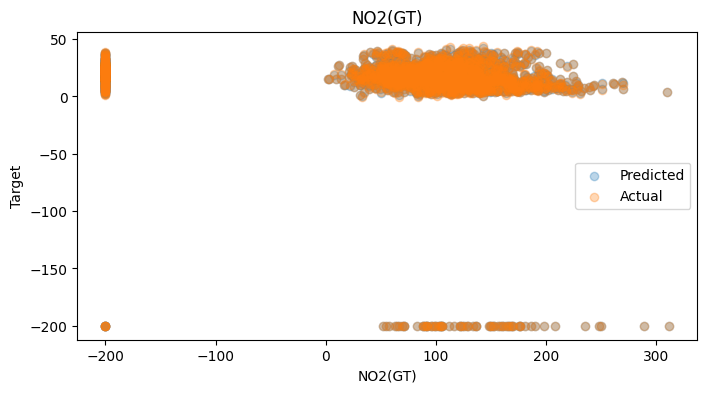

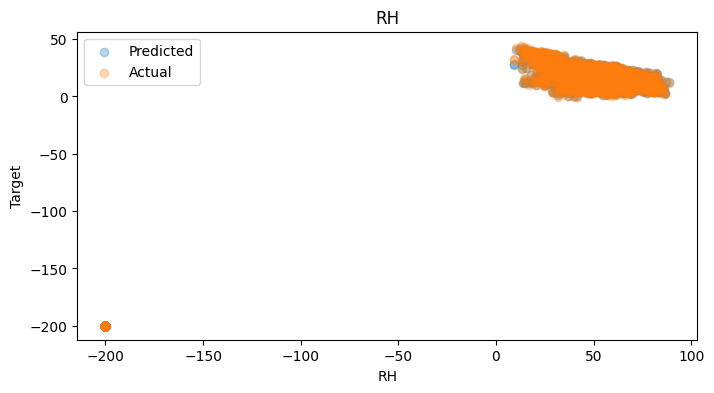

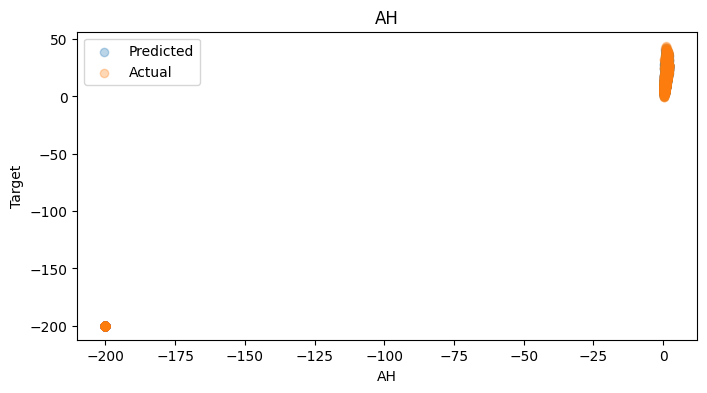

In [7]:
gb = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

for i, col in enumerate(X_numeric_data):
    plt.figure(figsize=(8, 4))
    plt.scatter(X_test[col], y_pred_gb, label='Predicted', alpha = 0.3)
    plt.scatter(X_test[col], y_test, label='Actual', alpha = 0.3)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.legend()
    plt.show()

Сравнить с линейной регрессией.

In [8]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Среднеквадратичная ошибка линейной регрессии: {mse_lr}')
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Среднеквадратичная ошибка метода бустинга: {mse_gb}')

Среднеквадратичная ошибка линейной регрессии: 34.977799383488524
Среднеквадратичная ошибка метода бустинга: 0.26048712174554817


#Пункт 3

Применить one hot и target encoding для категориальных признаков (взять данные, где такие признаки есть). Сравнить точность.

In [10]:
encoder_onehot = OneHotEncoder(cols=categorical_colums)
data_onehot = encoder_onehot.fit_transform(df)

X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(
    data_onehot.drop(target_name, axis=1),
    data_onehot[target_name],
    test_size=0.2,
)

lr = LinearRegression().fit(X_train_onehot, y_train_onehot)
y_pred_onehot_lr = lr.predict(X_test_onehot)
mse_onehot_lr = mean_squared_error(y_test_onehot, y_pred_onehot_lr)
print(mse_onehot_lr)

1941571571876375.0


In [8]:
encoder_target = TargetEncoder(cols=categorical_colums)
data_target = encoder_target.fit_transform(df, df[target_name])

X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(
    data_target.drop(target_name, axis=1),
    data_target[target_name],
    test_size=0.2,
)

lr = LinearRegression().fit(X_train_target, y_train_target)
y_pred_target_lr = lr.predict(X_test_target)
mse_target_lr = mean_squared_error(y_test_target, y_pred_target_lr)
print(mse_target_lr)

26.22010832843508


#Пункт 4

Визуализировать объекты (не обязательно для той же таблицы) в пространстве главных компонент.

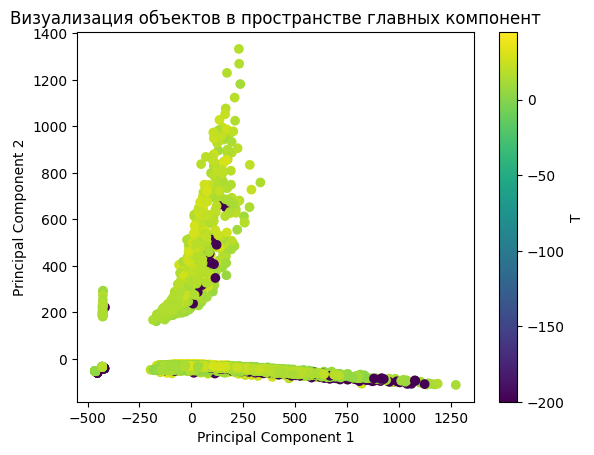

In [17]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_onehot)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df[target_name] = data_target[target_name]

plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df[target_name])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Визуализация объектов в пространстве главных компонент')
plt.colorbar(label=target_name)
plt.show()

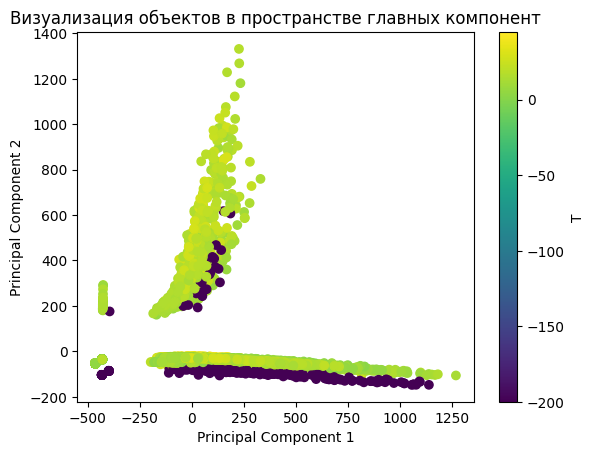

In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_target)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df[target_name] = data_target[target_name]

plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df[target_name])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Визуализация объектов в пространстве главных компонент')
plt.colorbar(label=target_name)
plt.show()